In [44]:
using Plots
X =  1:1:10
Y = [rand() for x in X]

10-element Array{Float64,1}:
 0.23667956663160505
 0.5272641568544474 
 0.601643922501101  
 0.3729152727163698 
 0.3783084020170706 
 0.5236229353646586 
 0.7971646938485888 
 0.9744388066219571 
 0.2519231535037523 
 0.269833634553885  

In [45]:
X

1:1:10

In [46]:
Y

10-element Array{Float64,1}:
 0.23667956663160505
 0.5272641568544474 
 0.601643922501101  
 0.3729152727163698 
 0.3783084020170706 
 0.5236229353646586 
 0.7971646938485888 
 0.9744388066219571 
 0.2519231535037523 
 0.269833634553885  

In [47]:
function lagrange(X,Y)
    interpolate = function(x)
        y = 0.0
        for k in 1:1:length(X)
            result = 1.0
            for i in 1:1:length(X)
                if i != k
                    result = result*((x-X[i])/(X[k]-X[i]))
                end
            end
            y += result*Y[k]
        end
        return y
    end
    return interpolate
end

lagrange (generic function with 1 method)

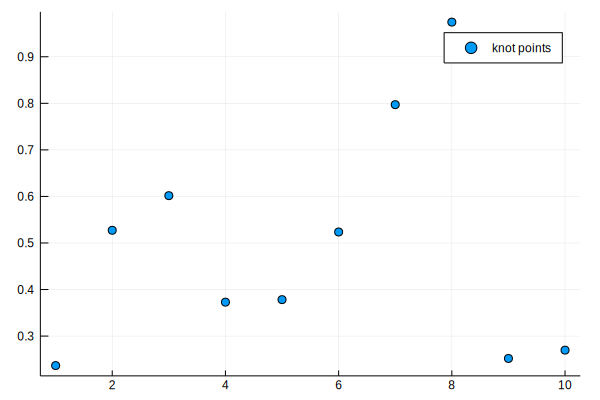

In [48]:
scatter(X,Y, label="knot points")

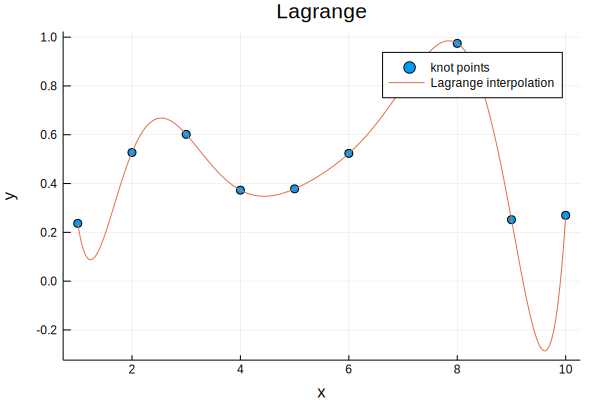

In [49]:
xsf=1:0.01:10
fit1=lagrange(X, Y)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="Lagrange interpolation", xlabel = "x", ylabel = "y", title = "Lagrange")

In [50]:
function newton(X,Y)
    P = Function[]
    push!(P,(val -> Y[1]))
    for i in 2:1:length(X)
        Ci = Y[i] - P[i-1](X[i])
        for k in 1:1:(i-1)
            Ci = Ci/(X[i]-X[k])
        end
        result = function(x)
            temp = Ci
            for j in 1:1:(i-1)
                temp = temp*(x-X[j])
            end
            return temp
        end
        fun = function(a)
            result(a) + P[i-1](a)
        end
        push!(P,fun)
    end
    return P[length(X)]
end

newton (generic function with 1 method)

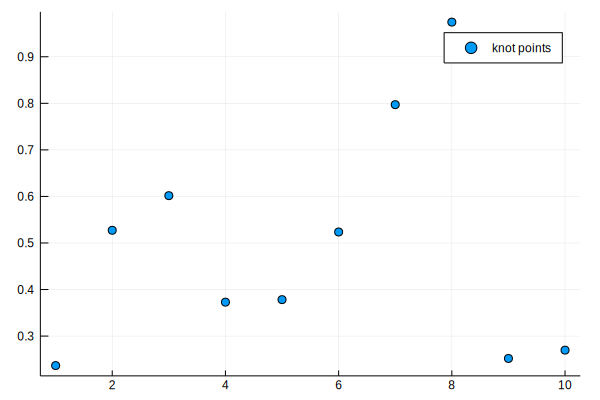

In [51]:
scatter(X,Y, label="knot points")

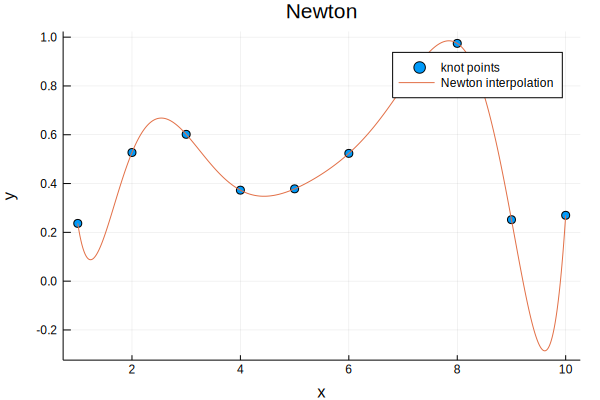

In [52]:
xsf=1:0.01:10
fit1=newton(X, Y)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="Newton interpolation", xlabel = "x", ylabel = "y", title = "Newton")

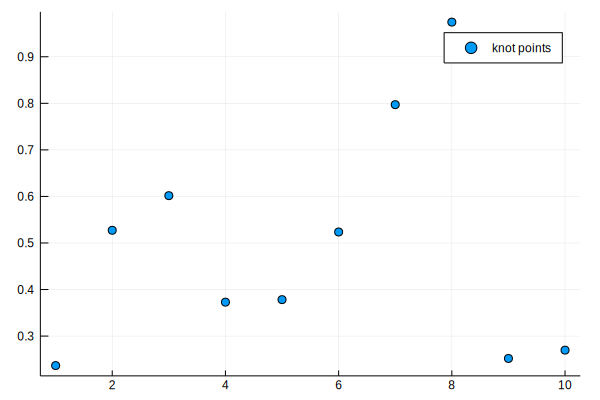

In [53]:
scatter(X,Y, label="knot points")

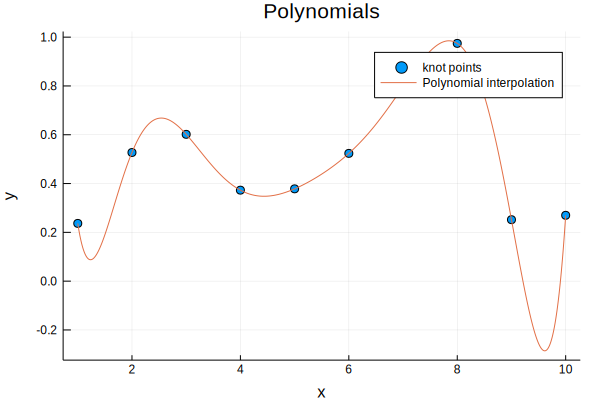

In [54]:
using Polynomials
xsf=1:0.01:10
fit1=polyfit(X, Y)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="Polynomial interpolation", xlabel = "x", ylabel = "y", title = "Polynomials")

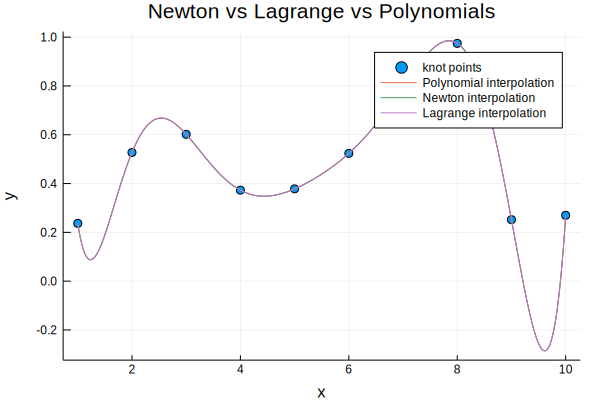

In [55]:
fit2=newton(X, Y)
C=[fit2(x) for x in xsf]
plot!(xsf,C, label="Newton interpolation")
fit3=lagrange(X, Y)
D=[fit3(x) for x in xsf]
plot!(xsf,D, label="Lagrange interpolation", xlabel = "x", ylabel = "y", title = "Newton vs Lagrange vs Polynomials")

In [56]:
using DataFrames
Times = DataFrame(Size=[],Lagrange=[],Newton=[],Polynomials=[])
for i = 10:10:100
  X =  1:1:i
  Y = [rand() for x in X]
    
  for k=1:1:10
    push!(Times,[i
    (@elapsed lagrange(X,Y))*1000000
    (@elapsed newton(X,Y))*1000000
    (@elapsed polyfit(X,Y))*1000000])
  end
end
Times

,Size,Lagrange,Newton,Polynomials
,Any,Any,Any,Any
1,10.0,4.388,86.721,132.478
2,10.0,1.092,68.305,58.089
3,10.0,0.98,72.622,17.813
4,10.0,0.912,64.236,72.893
5,10.0,0.96,65.246,59.257
6,10.0,0.949,63.902,15.998
7,10.0,0.893,67.871,14.405
8,10.0,0.919,73.499,44.257
9,10.0,0.889,67.33,55.196


In [57]:
using Statistics
LagrangeMean = by(Times,:Size,df -> mean(df[2]))
NewtonMean = by(Times,:Size,df -> mean(df[3]))
PolyMean = by(Times,:Size,df -> mean(df[4]))
LagrangeSD = by(Times,:Size,df -> std(df[2]))
NewtonSD = by(Times,:Size,df -> std(df[3]))
PolySD = by(Times,:Size,df -> std(df[4]))

Lagrange = DataFrame(Size = LagrangeMean[1],Average = LagrangeMean[2], STD = LagrangeSD[2])
Newton = DataFrame(Size = NewtonMean[1],Average = NewtonMean[2], STD = NewtonSD[2])
Polynom = DataFrame(Size = PolyMean[1],Average = PolyMean[2], STD = PolySD[2])
Lagrange

,Size,Average,STD
,Any,Float64,Float64
1,10.0,1.2954,1.08821
2,20.0,0.9084,0.015522
3,30.0,0.9499,0.0397561
4,40.0,2.2606,0.919951
5,50.0,2.3517,0.6665
6,60.0,3.4358,0.599125
7,70.0,3.6059,0.489353
8,80.0,3.4931,0.293976
9,90.0,3.3123,0.0969261


In [58]:
Newton

,Size,Average,STD
,Any,Float64,Float64
1,10.0,69.4198,6.94032
2,20.0,418.833,6.64678
3,30.0,1276.4,16.591
4,40.0,6098.48,6015.27
5,50.0,7512.13,2707.92
6,60.0,12859.1,6608.06
7,70.0,21999.7,14032.2
8,80.0,29194.3,10449.3
9,90.0,42437.5,10802.2


In [59]:
Polynom

,Size,Average,STD
,Any,Float64,Float64
1,10.0,48.5209,36.8367
2,20.0,43.222,22.0337
3,30.0,89.8058,25.7141
4,40.0,188.6,64.7928
5,50.0,232.716,46.0213
6,60.0,331.321,56.446
7,70.0,2321.3,3435.01
8,80.0,788.306,913.01
9,90.0,493.619,146.004


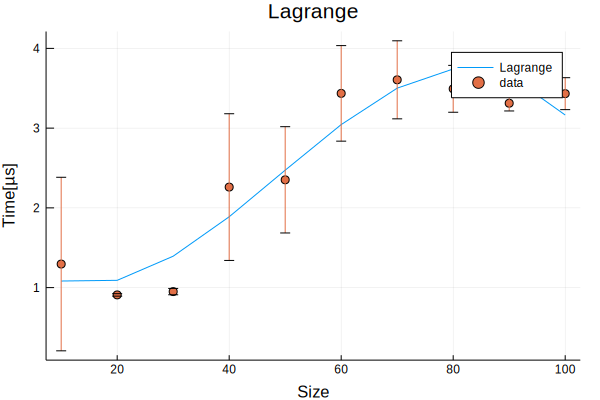

In [60]:
using Plots
LagrangeFit = polyfit(Lagrange[1], Lagrange[2],3)
plot(Lagrange[1], polyval(LagrangeFit,Lagrange[1]), title = "Lagrange", xlabel = "Size", ylabel = "Time[µs]", label = "Lagrange")
scatter!(Lagrange[1], Lagrange[2], yerror = Lagrange[3], label = "data")

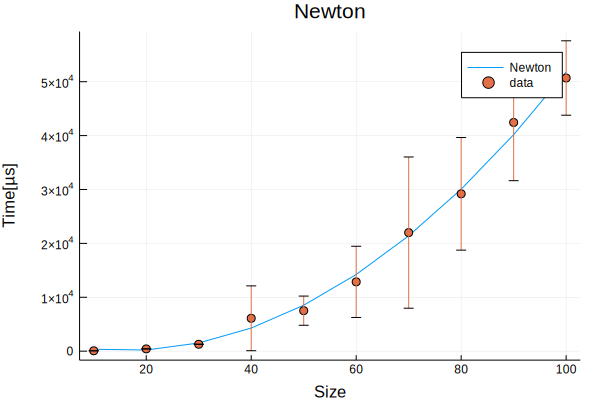

In [61]:
NewtonFit = polyfit(Newton[1], Newton[2],3)
plot(Newton[1], polyval(NewtonFit,Newton[1]), title = "Newton", xlabel = "Size", ylabel = "Time[µs]", label = "Newton")
scatter!(Newton[1], Newton[2], yerror = Newton[3], label = "data")

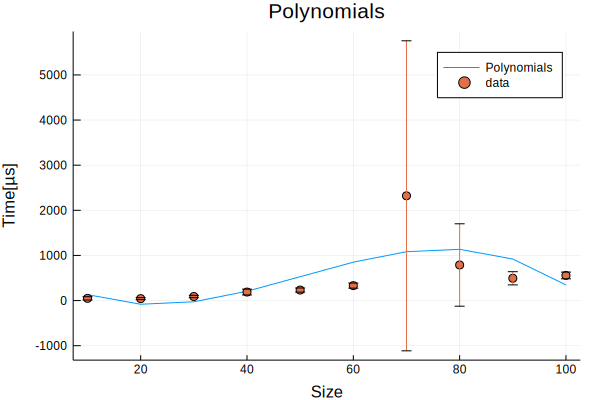

In [62]:
PolynomFit = polyfit(Polynom[1], Polynom[2],3)
plot(Polynom[1], polyval(PolynomFit,Polynom[1]), title = "Polynomials", xlabel = "Size", ylabel = "Time[µs]", label = "Polynomials")
scatter!(Polynom[1], Polynom[2], yerror = Polynom[3], label = "data")

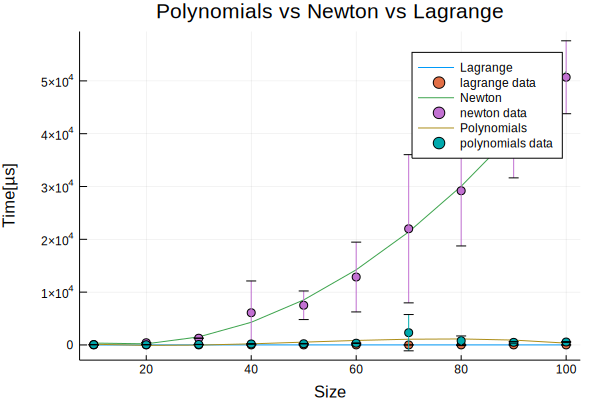

In [63]:
using Plots
LagrangeFit = polyfit(Lagrange[1], Lagrange[2],3)
plot(Lagrange[1], polyval(LagrangeFit,Lagrange[1]), title = "Lagrange", xlabel = "Size", ylabel = "Time[µs]", label = "Lagrange")
scatter!(Lagrange[1], Lagrange[2], yerror = Lagrange[3], label = "lagrange data")
NewtonFit = polyfit(Newton[1], Newton[2],3)
plot!(Newton[1], polyval(NewtonFit,Newton[1]), title = "Newton", xlabel = "Size", ylabel = "Time[µs]", label = "Newton")
scatter!(Newton[1], Newton[2], yerror = Newton[3], label = "newton data")
PolynomFit = polyfit(Polynom[1], Polynom[2],3)
plot!(Polynom[1], polyval(PolynomFit,Polynom[1]), title = "Polynomials vs Newton vs Lagrange", xlabel = "Size", ylabel = "Time[µs]", label = "Polynomials")
scatter!(Polynom[1], Polynom[2], yerror = Polynom[3], label = "polynomials data")

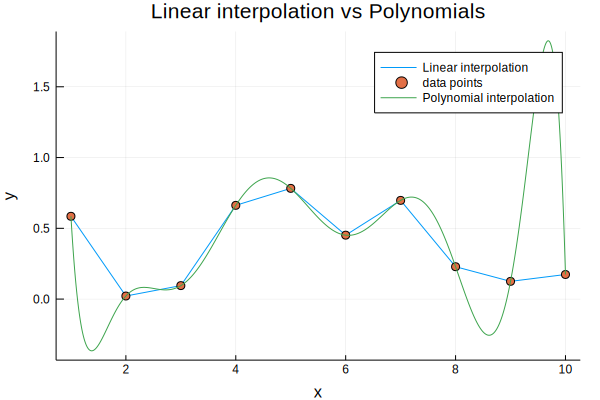

In [65]:
#Pkg.add("Interpolations")
using Interpolations
xsf=1:0.01:10
X =  1:1:10
Y = [rand() for x in X]
linear = LinearInterpolation(X, Y)
cubic = CubicSplineInterpolation(X, Y)
bspline = interpolate(Y, BSpline(Quadratic(Line(OnCell()))))
polynom = polyfit(X,Y)

linearY = [linear(x) for x in xsf]
cubicY = [cubic(x) for x in xsf]
bsplineY = [bspline(x) for x in xsf]
polynomY = [polynom(x) for x in xsf]

plot(xsf,linearY, label="Linear interpolation")
scatter!(X,Y, label="data points")
plot!(xsf,polynomY, label="Polynomial interpolation", xlabel="x", ylabel="y", title="Linear interpolation vs Polynomials")

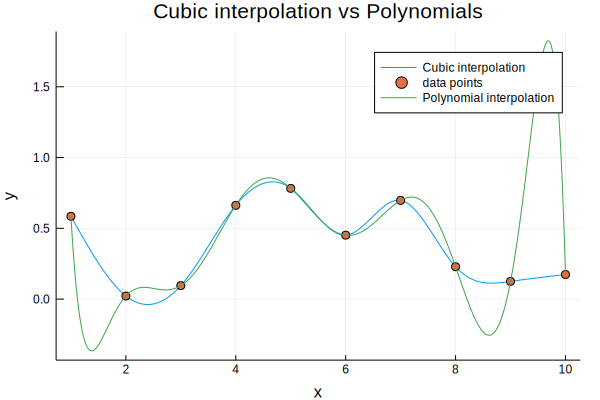

In [66]:
plot(xsf,cubicY, label="Cubic interpolation")
scatter!(X,Y, label="data points")
plot!(xsf,polynomY, label="Polynomial interpolation", xlabel="x", ylabel="y", title="Cubic interpolation vs Polynomials")

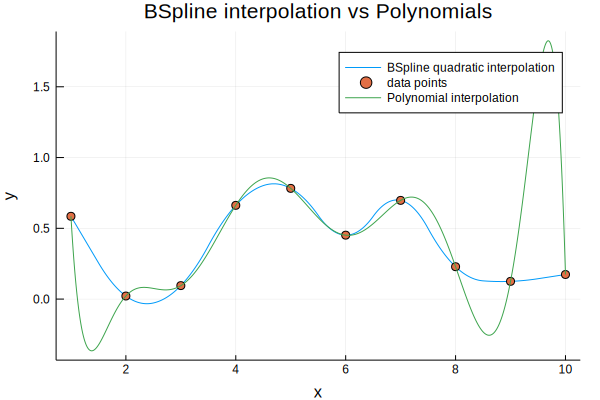

In [67]:
plot(xsf,bsplineY, label="BSpline quadratic interpolation")
scatter!(X,Y, label="data points")
plot!(xsf,polynomY, label="Polynomial interpolation", xlabel="x", ylabel="y", title="BSpline interpolation vs Polynomials")

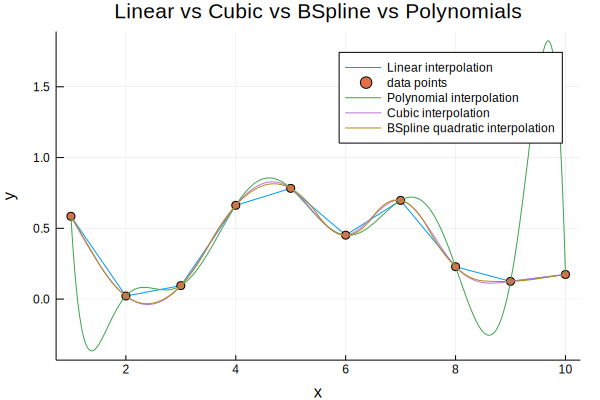

In [68]:
plot(xsf,linearY, label="Linear interpolation")
scatter!(X,Y, label="data points")
plot!(xsf,polynomY, label="Polynomial interpolation")
plot!(xsf,cubicY, label="Cubic interpolation")
plot!(xsf,bsplineY, label="BSpline quadratic interpolation", xlabel="x", ylabel="y", title="Linear vs Cubic vs BSpline vs Polynomials")

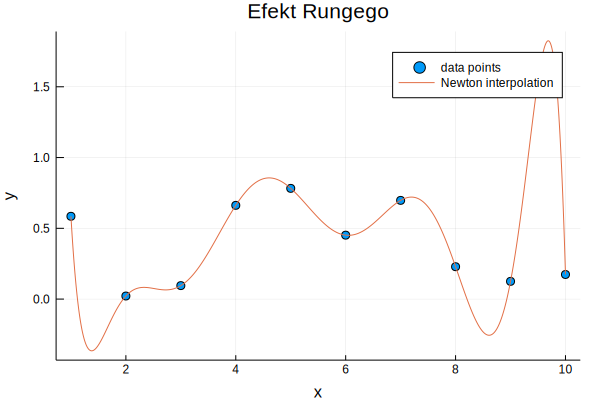

In [69]:
xsf=1:0.01:10
fit1=newton(X, Y)
B=[fit1(x) for x in xsf]
scatter(X,Y, label="data points")
plot!(xsf,B, label="Newton interpolation", xlabel="x", ylabel="y", title="Efekt Rungego")

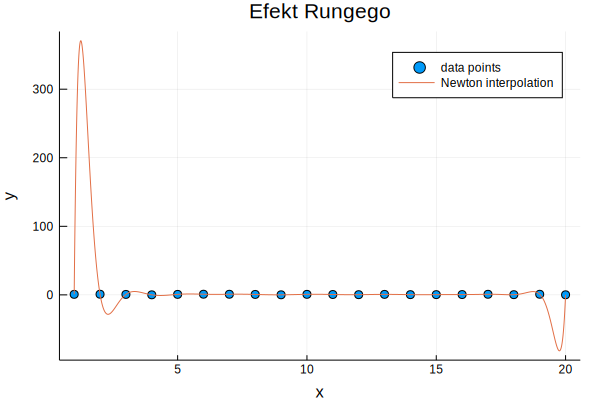

In [70]:
using Plots
X = 1:1:20
Y = [rand() for x in X]
xsf=1:0.01:20
fit1=newton(X, Y)
B=[fit1(x) for x in xsf]
scatter(X,Y, label="data points")
plot!(xsf,B, label="Newton interpolation", xlabel="x", ylabel="y", title="Efekt Rungego")